In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Loading

In [ ]:
data = pd.read_csv("Womens_Clothing_E-Commerce_Reviews.csv")

In [97]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22867 entries, 0 to 22866
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               22867 non-null  int64  
 1   Clothing ID              22867 non-null  int64  
 2   Age                      22867 non-null  int64  
 3   Title                    19874 non-null  object 
 4   Review Text              22867 non-null  object 
 5   Rating                   22409 non-null  float64
 6   Recommended IND          22867 non-null  int64  
 7   Positive Feedback Count  22867 non-null  int64  
 8   Division Name            21709 non-null  object 
 9   Department Name          22166 non-null  object 
 10  Class Name               22394 non-null  object 
 11  Review Date              22867 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.1+ MB


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Date
0,12277,377,21,NaN,"I got one of these tanks, and went back and bo...",5.0,1,0,initmates,INTIMATE,Lounge,2021-03-12
1,14172,867,34,Weird collar,The collar on this sweater is too stiff for my...,3.0,0,2,General,Tops,Knits,2021-03-07
2,16848,834,63,Pretty & comfy,I bought this in blue/black. it is so pretty. ...,5.0,1,2,general,NaN,Blouses,2021-08-05
3,14695,1004,58,Great skirt and yet....no pockets,I bought this in the faded pink rose color (wh...,4.0,1,13,General Petite,Bottoms,Skirts,2021-02-23
4,4576,820,43,Bainbridge!,I love this blouse. it is soft and has nice dr...,5.0,1,0,General,TOPS,Blouses,2021-07-09


# Data Cleaning

Replacing Missing Values with "Unknown" 

In [98]:
data['Division Name'].fillna('Unknown', inplace=True)
data['Department Name'].fillna('Unknown', inplace=True)
data['Class Name'].fillna('Unknown', inplace=True)
data['Rating'].fillna(data['Rating'].median(), inplace=True)
data['Title'].fillna('No Title', inplace=True)

Removing Duplicate Rows

In [105]:
data.drop_duplicates(inplace=True)

Standardizing column text formats for uniformity and Handling Outliers

In [106]:
data['Division Name'] = data['Division Name'].str.strip().str.title()
data['Department Name'] = data['Department Name'].str.strip().str.title()


upper_limit = data['Positive Feedback Count'].quantile(0.99)
data['Positive Feedback Count'] = data['Positive Feedback Count'].clip(upper=upper_limit)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22647 entries, 0 to 22866
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               22647 non-null  int64  
 1   Clothing ID              22647 non-null  int64  
 2   Age                      22647 non-null  int64  
 3   Title                    22647 non-null  object 
 4   Review Text              22647 non-null  object 
 5   Rating                   22647 non-null  float64
 6   Recommended IND          22647 non-null  int64  
 7   Positive Feedback Count  22647 non-null  float64
 8   Division Name            22647 non-null  object 
 9   Department Name          22647 non-null  object 
 10  Class Name               22647 non-null  object 
 11  Review Date              22647 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.2+ MB


# Descriptive Data Analysis, Data Aggregation

In [108]:
average_rating = data['Rating'].mean()
recommendation_percentage = data['Recommended IND'].mean() * 100

print("Average Rating:", average_rating)
print("Recommendation Percentage:", recommendation_percentage)

Average Rating: 4.199496622069148
Recommendation Percentage: 81.88722568110566


In [109]:
age_groups = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70, 80], right=False)
age_group_ratings = data.groupby(age_groups)['Rating'].mean()
print("Average Rating by Age Group:\n", age_group_ratings)

division_ratings = data.groupby('Division Name')['Rating'].mean()
department_ratings = data.groupby('Department Name')['Rating'].mean()
class_ratings = data.groupby('Class Name')['Rating'].mean()

print("Average Rating by Division:\n", division_ratings)
print("Average Rating by Department:\n", department_ratings)
print("Average Rating by Class:\n", class_ratings.head)

Average Rating by Age Group:
 Age
[20, 30)    4.203790
[30, 40)    4.169162
[40, 50)    4.160427
[50, 60)    4.244653
[60, 70)    4.304386
[70, 80)    4.197183
Name: Rating, dtype: float64
Average Rating by Division:
 Division Name
General           4.185046
General Petite    4.214324
Initmates         4.270694
Unknown           4.180628
Name: Rating, dtype: float64
Average Rating by Department:
 Department Name
Bottoms     4.301823
Dresses     4.157080
Intimate    4.278607
Jackets     4.257261
Tops        4.172492
Trend       3.887931
Unknown     4.205499
Name: Rating, dtype: float64
Average Rating by Class:
 <bound method NDFrame.head of Class Name
Blouses           4.153873
Casual bottoms    4.000000
Chemises          4.000000
Dresses           4.154639
Fine gauge        4.247115
Intimates         4.263889
Jackets           4.296241
Jeans             4.355494
Knits             4.163391
Layering          4.343511
Legwear           4.253247
Lounge            4.299237
Outerwear        

In [110]:
# Aggregate feedback counts and average ratings by division and department
division_feedback = data.groupby('Division Name').agg({
    'Positive Feedback Count': 'mean',
    'Rating': 'mean'
})
department_feedback = data.groupby('Department Name').agg({
    'Positive Feedback Count': 'mean',
    'Rating': 'mean'
})

print("Feedback and Ratings by Division:\n", division_feedback)
print("Feedback and Ratings by Department:\n", department_feedback)


dresses_data = data[data['Department Name'] == 'Dresses']
print("Descriptive stats for Dresses Department:\n", dresses_data.describe())


Feedback and Ratings by Division:
                 Positive Feedback Count    Rating
Division Name                                    
General                        2.832312  4.185046
General Petite                 2.906570  4.214324
Initmates                      2.462342  4.270694
Unknown                        2.684119  4.180628
Feedback and Ratings by Department:
                  Positive Feedback Count    Rating
Department Name                                   
Bottoms                         2.441234  4.301823
Dresses                         3.282711  4.157080
Intimate                        2.506841  4.278607
Jackets                         2.815353  4.257261
Tops                            2.730245  4.172492
Trend                           3.534483  3.887931
Unknown                         2.913169  4.205499
Descriptive stats for Dresses Department:
          Unnamed: 0  Clothing ID          Age       Rating  Recommended IND  \
count   5946.000000  5946.000000  5946.000000  

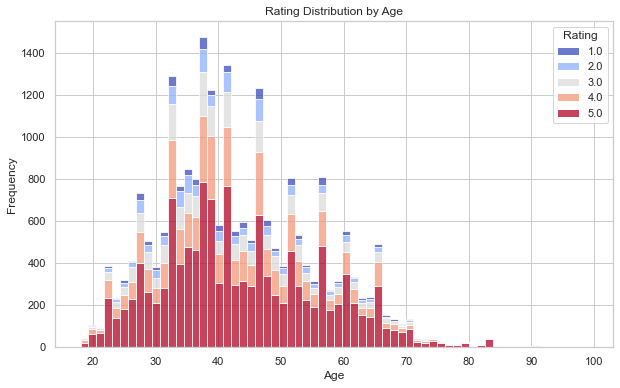

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', hue='Rating', multiple='stack', palette="coolwarm")
plt.title('Rating Distribution by Age')
plt.xlabel('Age')

plt.ylabel('Frequency')
plt.show()

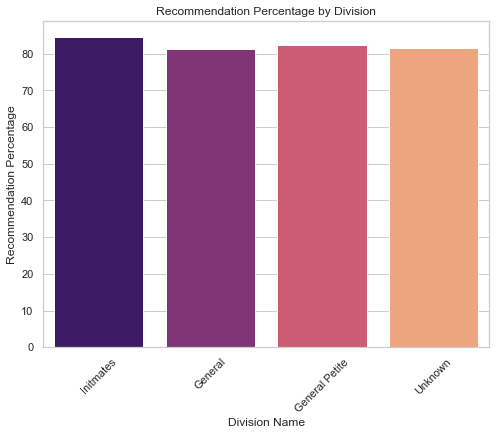

In [111]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['Division Name'], y=data['Recommended IND'] * 100, estimator=np.mean, ci=None, palette="magma")
plt.title('Recommendation Percentage by Division')
plt.xlabel('Division Name')
plt.ylabel('Recommendation Percentage')
plt.xticks(rotation=45)
plt.show()

# Time Series

In [112]:
data['Review Date'] = pd.to_datetime(data['Review Date'])

In [113]:
data.set_index('Review Date', inplace=True)

In [114]:
monthly_avg_rating = data['Rating'].resample('M').mean()
monthly_recommendation = data['Recommended IND'].resample('M').mean() * 100
monthly_feedback = data['Positive Feedback Count'].resample('M').mean()

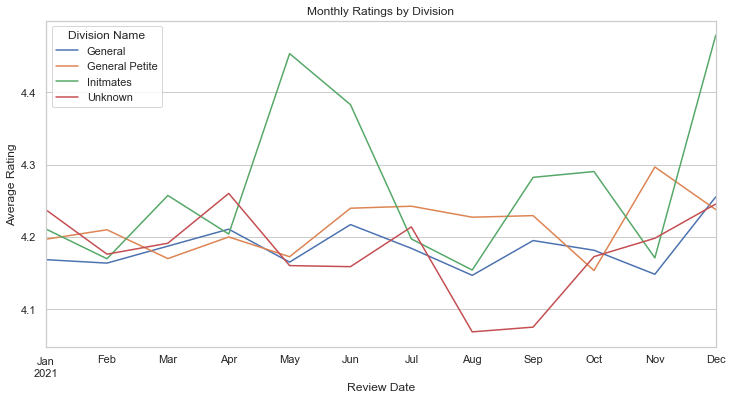

In [115]:
grouped_time_series = data.groupby('Division Name')['Rating'].resample('M').mean()
grouped_time_series.unstack(level=0).plot(figsize=(12, 6))
plt.title('Monthly Ratings by Division')
plt.ylabel('Average Rating')
plt.show()

In [116]:
import plotly.express as px

fig = px.line(monthly_recommendation, title='Monthly Recommendation Percentage')
fig.update_layout(xaxis_title='Month', yaxis_title='Recommendation Percentage')
fig.show()

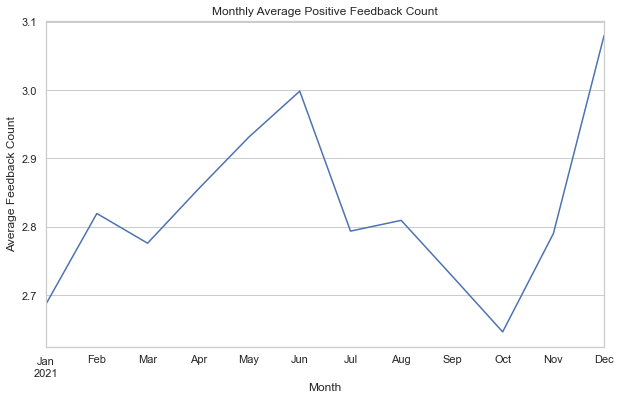

In [117]:
plt.figure(figsize=(10, 6))
monthly_feedback.plot()
plt.title('Monthly Average Positive Feedback Count')
plt.xlabel('Month')
plt.ylabel('Average Feedback Count')
plt.show()